In [41]:
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [42]:
XYZ_Edges = pd.read_csv('Edges.csv')
XYZ_Edges

,Source,Target,Weight,Type
0,1321,1327,0.075380,Undirected
1,1467,1474,0.076665,Undirected
2,1945,1947,0.079329,Undirected
3,1321,1348,0.079342,Undirected
4,1715,1717,0.080427,Undirected
5,1355,1366,0.080645,Undirected
6,1798,1803,0.081204,Undirected
7,1781,1782,0.082324,Undirected
8,1930,1947,0.082592,Undirected
9,1271,1295,0.082813,Undirected


In [43]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.3210000e+03, 1.3270000e+03, 7.5379686e-02],
       [1.4670000e+03, 1.4740000e+03, 7.6665317e-02],
       [1.9450000e+03, 1.9470000e+03, 7.9328886e-02],
       ...,
       [1.9880000e+03, 1.9890000e+03, 4.6966604e+00],
       [1.8700000e+02, 1.9500000e+02, 5.2998370e+00],
       [2.7000000e+01, 4.1000000e+01, 5.4235855e+00]])

In [44]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] )
    G.add_weighted_edges_from([(e)])    

In [45]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

community: 43.0
modularity: 0.9370454314586609


Community 0
['1746', '1775', '1722', '1783', '1790', '1732', '1727', '1810', '1753', '1796', '1717', '1755', '1784', '1785', '1778', '1749', '1789', '1822', '1743', '1841', '1733', '1798', '1838', '1794', '1791', '1833', '1819', '1821', '1824', '1812', '1830', '1782', '1737', '1744', '1818', '1750', '1761', '1806', '1835', '1774', '1742', '1754', '1768', '1795', '1765', '1773', '1839', '1767', '1801', '1786', '1781', '1805', '1770', '1745', '1771', '1759', '1751', '1808', '1779', '1777', '1825', '1788', '1780', '1772', '1832', '1764', '1797', '1826', '1766', '1803', '1760', '1828', '1758', '1747', '1762', '1802', '1836', '1809', '1748', '1814', '1811', '1741', '1757', '1792', '1820', '1736', '1829', '1831', '1823', '1834', '1813', '1799', '1740', '1815', '1756', '1817', '1800', '1752', '1787', '1807', '1793', '1776', '1738', '1804', '1769', '1816', '1763', '1827']
Community 1
['486', '544', '455', '524', '482', '513', '459', '462', '512', '484', '509', '508', '516', '503', '452', '507'

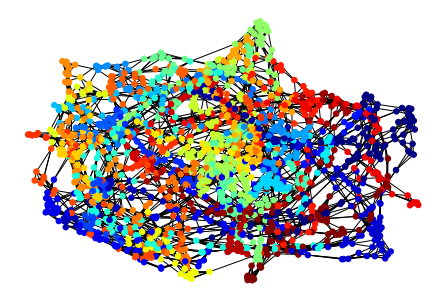

In [46]:
#assign node color based on community in network
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

In [47]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))            

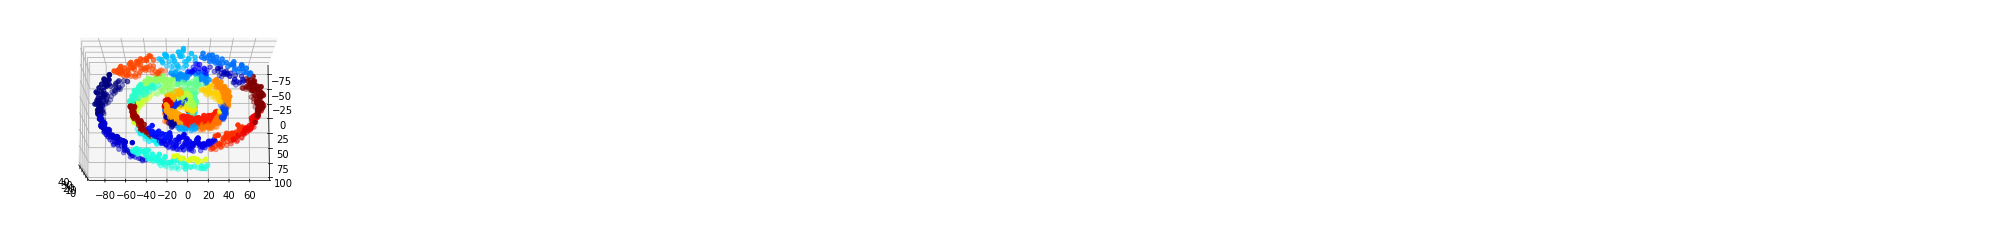

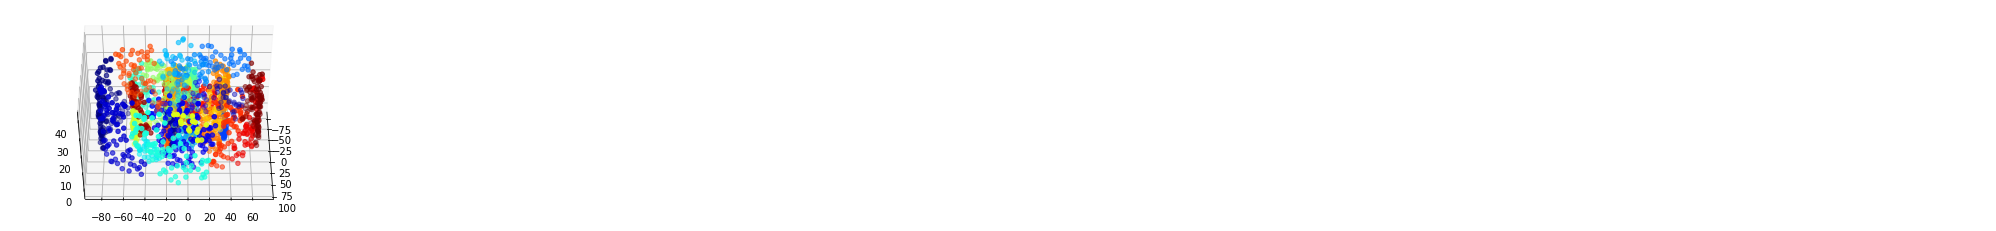

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)